In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style

In [ ]:
df = pd.read_csv("C:\\Users\\PRATEEK\\Desktop\\Prateek\\Data\\spam.csv",encoding = "latin-1")

In [ ]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2051,ham,Hey darlin.. i can pick u up at college if u t...,NaN,NaN,NaN
3517,ham,Are you willing to go for apps class.,NaN,NaN,NaN
1089,ham,Goodmorning today i am late for &lt;DECIMAL&g...,NaN,NaN,NaN
2895,spam,pdate_Now - Double mins and 1000 txts on Orang...,NaN,NaN,NaN
2052,spam,Call 09094100151 to use ur mins! Calls cast 10...,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df.shape

(5572, 5)

In [ ]:
df.duplicated().sum()

403

In [ ]:
df.drop_duplicates(keep = "first",inplace = True)

In [ ]:
df.isna().sum()

v1               0
v2               0
Unnamed: 2    5126
Unnamed: 3    5159
Unnamed: 4    5164
dtype: int64

In [ ]:
df.drop(columns = ["Unnamed: 2","Unnamed: 3","Unnamed: 4"] , inplace = True)

In [ ]:
df.shape

(5169, 2)

In [ ]:
df.rename(columns = {"v1":"spam" , "v2":"text"} , inplace = True)

In [ ]:
df["spam"].replace({"ham":0, "spam":1} , inplace = True)

In [ ]:
df.head()

,spam,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.describe()

,spam
count,5169.000000
mean,0.126330
std,0.332253
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


#EDA

In [ ]:
df["spam"].value_counts()

spam
0    4516
1     653
Name: count, dtype: int64

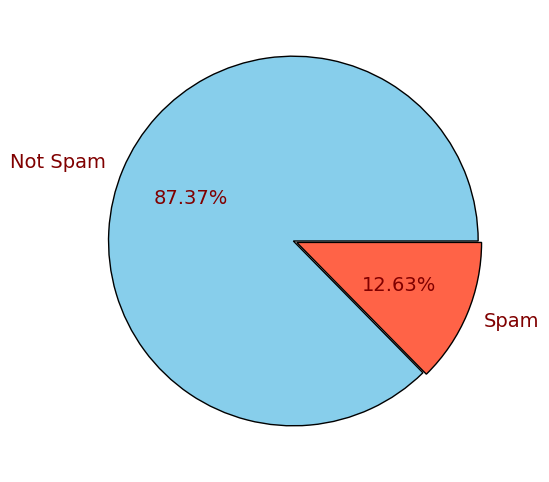

In [ ]:
plt.figure(figsize = (8,6))
plt.pie(df["spam"].value_counts() , labels = ["Not Spam" , "Spam"] , radius = 1 , colors=["skyblue","tomato"] , explode =[0.0 , 0.02],
        autopct = "%0.2f%%" ,textprops = {"color":"maroon" , "fontsize":14},wedgeprops = {"linewidth":1 , "edgecolor":"k"} )
plt.show()

The Data is highly imbalance

In [ ]:
df["total_alpha"] = df["text"].apply(len)

In [ ]:
df.head()

,spam,text,total_alpha
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PRATEEK\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
df["word_count"] = df["text"].apply(lambda x: len(nltk.word_tokenize(x)))

In [ ]:
df["sent_count"] = df["text"].apply(lambda x: len(nltk.sent_tokenize(x)))

In [ ]:
df.sample(5)

,spam,text,total_alpha,word_count,sent_count
4642,0,Sorry i din lock my keypad.,27,7,1
3893,1,Dear Dave this is your final notice to collect...,153,30,3
1961,0,LOL that would be awesome payback.,34,7,1
2900,1,Ur cash-balance is currently 500 pounds - to m...,139,26,2
914,0,"Call me da, i am waiting for your call.",39,11,1


In [ ]:
df[df["spam"] == 0][["total_alpha" , "word_count" , 'sent_count']].describe()

,total_alpha,word_count,sent_count
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
df[df["spam"] == 1][["total_alpha", "word_count" , 'sent_count']].describe()

,total_alpha,word_count,sent_count
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


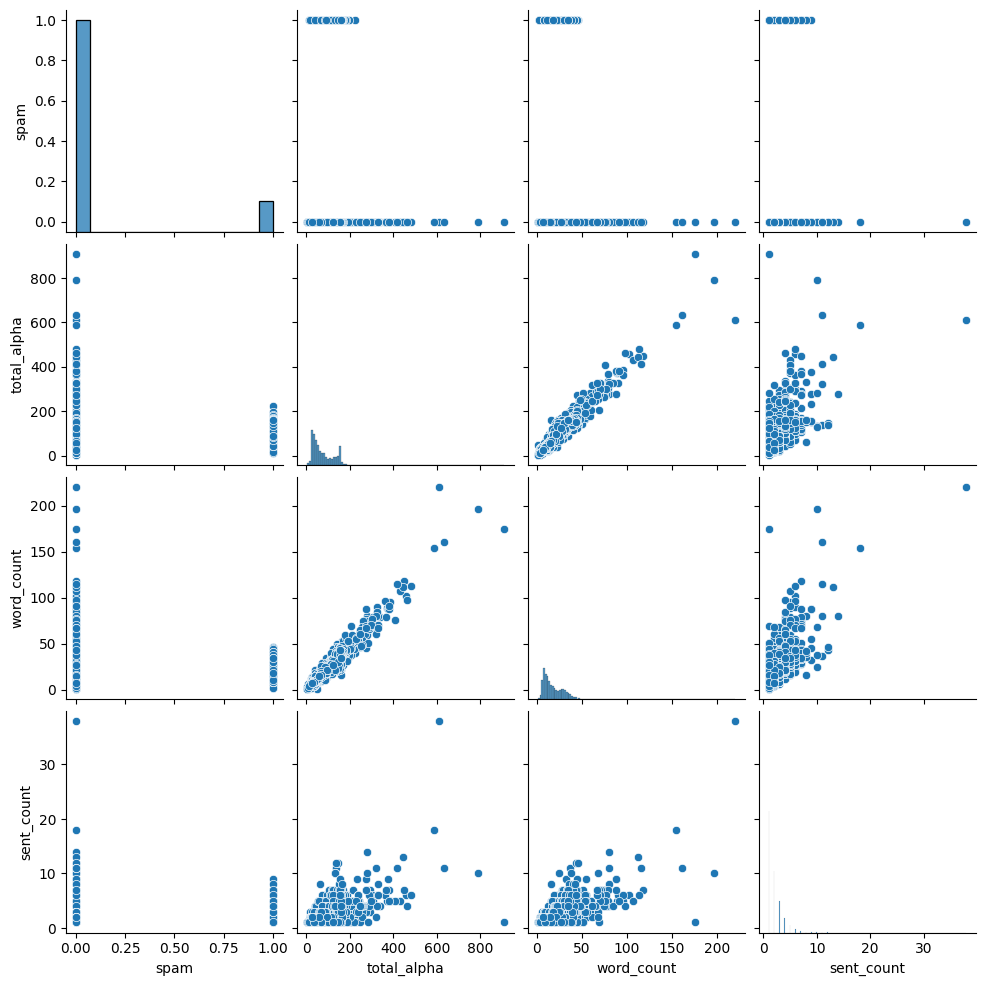

In [ ]:
sns.pairplot(df)
plt.show()

In [ ]:
mean_alpha = [df[df["spam"]==0]["total_alpha"].mean() , df[df["spam"]==1]["total_alpha"].mean()]
mean_word = [df[df["spam"]==0]["word_count"].mean() , df[df["spam"]==1]["word_count"].mean()]
mean_sent = [df[df["spam"]==0]["sent_count"].mean() , df[df["spam"]==1]["sent_count"].mean()]

target = ["Not Spam" ,'Spam']


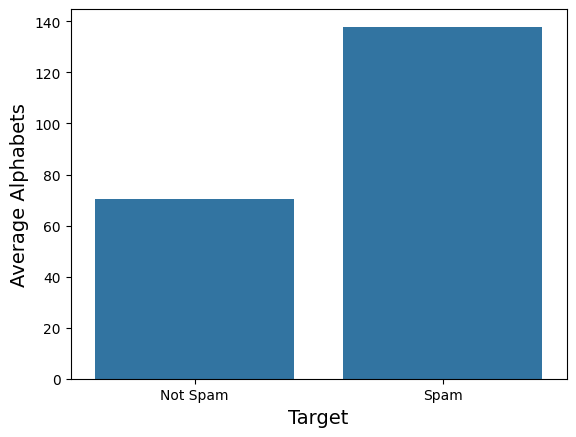

In [ ]:
sns.barplot(x = target ,y = mean_alpha )
plt.xlabel("Target", fontsize = 14)
plt.ylabel("Average Alphabets" , fontsize = 14)
plt.show()

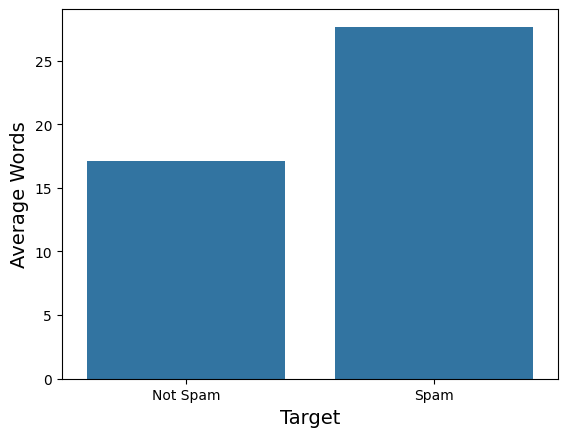

In [ ]:
sns.barplot(x = target ,y = mean_word )
plt.xlabel("Target", fontsize = 14)
plt.ylabel("Average Words" , fontsize = 14)
plt.show()

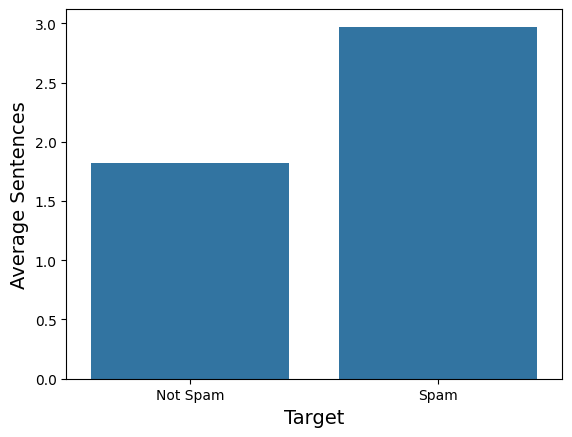

In [ ]:
sns.barplot(x = target ,y = mean_sent )
plt.xlabel("Target", fontsize = 14)
plt.ylabel("Average Sentences" , fontsize = 14)
plt.show()

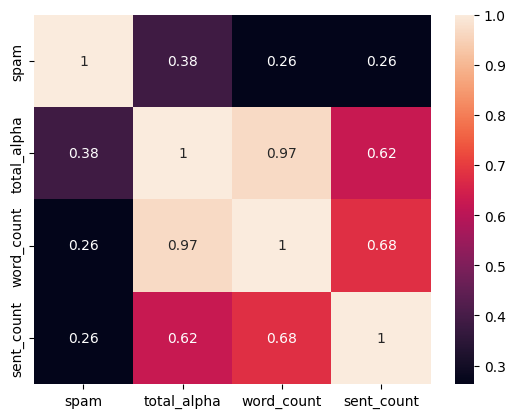

In [ ]:
sns.heatmap(df.corr(numeric_only=True) , annot = True)
plt.show()

removing the special words , stopping words and punctuation

In [ ]:
from nltk.corpus import stopwords

nltk.downloader("stopwords")
stpwrd = stopwords.words("english")

stpwrd.append("subject")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PRATEEK\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
count = 0
for i in stpwrd:
  print(i)
  if count > 10:
    break
  count = count+1


i
me
my
myself
we
our
ours
ourselves
you
you're
you've
you'll


Stopwords in English Language.


In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

Punctuations.

In [ ]:
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()

In [ ]:
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  lst = []

  for i in text:
    if i.isalnum():
      lst.append(i)

  text = lst[:]
  lst.clear()

  for i in text:
    if i not in string.punctuation and i not in stpwrd:
      lst.append(i)

  text = lst[:]
  lst.clear()

  for i in text:
    lst.append(ps.stem(i))

  return " ".join(lst)

In [ ]:
df["transformed_text"] = df["text"].apply(transform_text)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   spam              5169 non-null   int64 
 1   text              5169 non-null   object
 2   total_alpha       5169 non-null   int64 
 3   word_count        5169 non-null   int64 
 4   sent_count        5169 non-null   int64 
 5   transformed_text  5169 non-null   object
dtypes: int64(4), object(2)
memory usage: 282.7+ KB


In [ ]:
df.head()

,spam,text,total_alpha,word_count,sent_count,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


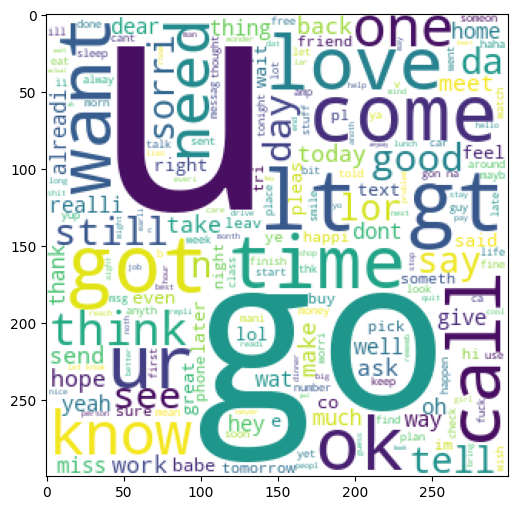

In [ ]:
from wordcloud import WordCloud

wc = WordCloud(height = 300 , width = 300 , background_color = "white")


spam_cloud = wc.generate(df[df["spam"]==0]["transformed_text"].str.cat(sep = " "))


plt.figure(figsize = (10,6))
plt.imshow(spam_cloud)
plt.show()

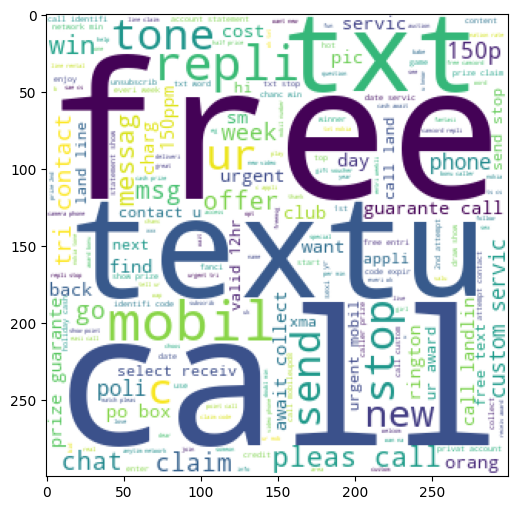

In [ ]:
spam_cloud = wc.generate(df[df["spam"]==1]["transformed_text"].str.cat(sep = " "))


plt.figure(figsize = (10,6))
plt.imshow(spam_cloud)
plt.show()

In [ ]:
from collections import Counter

In [ ]:
non_spam_list = []
for i in df[df["spam"]==0]["transformed_text"].tolist():
  for j in i.split():
    non_spam_list.append(j)

print(len(non_spam_list))

35404


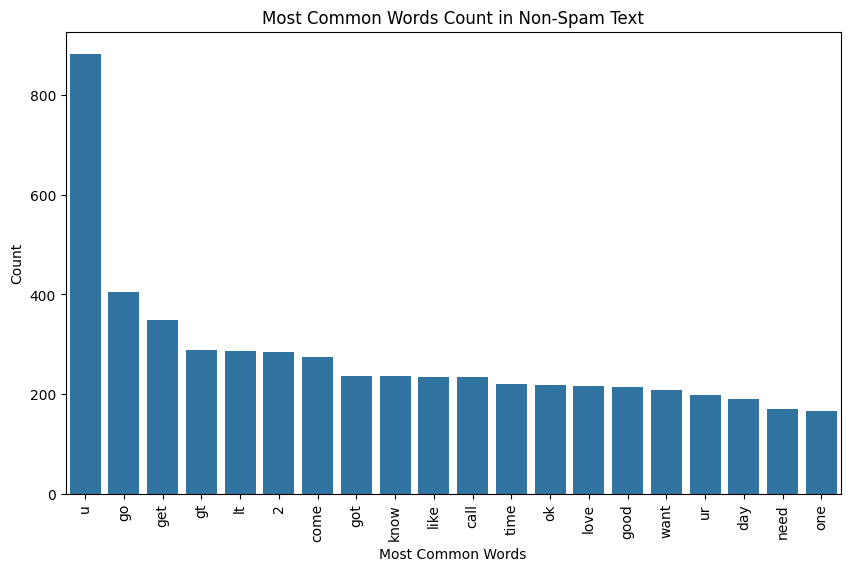

In [ ]:
plt.figure(figsize = (10,6))
sns.barplot(x = pd.DataFrame(Counter(non_spam_list).most_common(20))[0] , y = pd.DataFrame(Counter(non_spam_list).most_common(30))[1])
plt.xticks(rotation = "vertical")
plt.xlabel("Most Common Words")
plt.ylabel("Count")
plt.title("Most Common Words Count in Non-Spam Text")
plt.show()

In [ ]:
spam_list = []
for i in df[df["spam"]==1]["transformed_text"].tolist():
  for j in i.split():
    spam_list.append(j)

print(len(spam_list))

9938


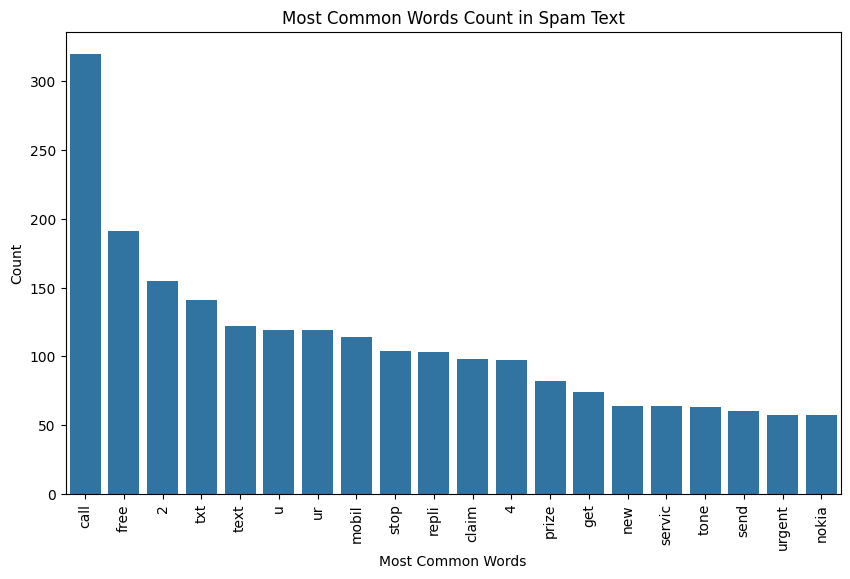

In [ ]:
plt.figure(figsize = (10,6))
sns.barplot(x = pd.DataFrame(Counter(spam_list).most_common(20))[0] , y = pd.DataFrame(Counter(spam_list).most_common(25))[1])
plt.xticks(rotation = "vertical")
plt.xlabel("Most Common Words")
plt.ylabel("Count")
plt.title("Most Common Words Count in Spam Text")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
from sklearn.metrics import accuracy_score , precision_score ,recall_score , classification_report

In [ ]:
cv = CountVectorizer()
tf = TfidfVectorizer()
X = tf.fit_transform(df["transformed_text"]).toarray()

In [ ]:
y = df["spam"]

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.25 , random_state = 2)

print("X train :",X_train.shape)
print("X test :",X_test.shape)
print("y train :",y_train.shape)
print("y test :",y_test.shape)

X train : (3876, 6707)
X test : (1293, 6707)
y train : (3876,)
y test : (1293,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB , MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , BaggingClassifier , AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
LR = LogisticRegression()
Svm = SVC(kernel = "linear" , gamma = 1.0 )
gb = GaussianNB()
mb = MultinomialNB()
KNN = KNeighborsClassifier()
dc = DecisionTreeClassifier(max_depth = 20)
rf = RandomForestClassifier(n_estimators = 50 , random_state=2)
bc = BaggingClassifier(n_estimators = 50, random_state=2)
ada = AdaBoostClassifier(n_estimators = 50, random_state=2)
gradient = GradientBoostingClassifier(n_estimators = 50, random_state=2)
xgb = XGBClassifier(n_estimators = 50, random_state=2)

In [ ]:
clf = {"Logistic Regression" : LR ,
       "SVC" : Svm ,
       "Gaussian NB" : gb ,
       "Multinomial NB" : mb,
       "K Neighbors": KNN,
       "Decision Tree" : dc ,
       "Random Forest": rf ,
       "AdaBoost" : ada ,
       "Gradient Boosting" : gradient,
       "XG Boost": xgb}

acc = []
prcn = []
recall = []

In [ ]:
def model_train(name,model):
  model.fit(X_train , y_train)
  y_pred = model.predict(X_test)

  acc.append(accuracy_score(y_test , y_pred))
  prcn.append(precision_score(y_test , y_pred))
  recall.append(recall_score(y_test , y_pred))

  print(name)
  print(classification_report(y_test , y_pred))
  print("\n\n\n")

In [ ]:
for name,model in clf.items():
  model_train(name , model)

Logistic Regression
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1130
           1       0.98      0.60      0.74       163

    accuracy                           0.95      1293
   macro avg       0.96      0.80      0.86      1293
weighted avg       0.95      0.95      0.94      1293





SVC
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1130
           1       0.98      0.83      0.90       163

    accuracy                           0.98      1293
   macro avg       0.98      0.91      0.94      1293
weighted avg       0.98      0.98      0.98      1293





Gaussian NB
              precision    recall  f1-score   support

           0       0.97      0.88      0.92      1130
           1       0.49      0.82      0.61       163

    accuracy                           0.87      1293
   macro avg       0.73      0.85      0.77      1293
weighted avg       0.91      0

c:\Users\PRATEEK\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


XG Boost
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1130
           1       0.94      0.81      0.87       163

    accuracy                           0.97      1293
   macro avg       0.96      0.90      0.93      1293
weighted avg       0.97      0.97      0.97      1293







In [ ]:
model_performance = pd.DataFrame({"Algorithm":clf.keys() , "Accuracy": acc ,"Precision":prcn , "Recall":recall}).sort_values(by = ["Precision","Accuracy"] , ascending = [False,False])

In [ ]:
model_performance

,Algorithm,Accuracy,Precision,Recall
6,Random Forest,0.975251,1.000000,0.803681
3,Multinomial NB,0.959783,1.000000,0.680982
4,K Neighbors,0.903326,1.000000,0.233129
0,Logistic Regression,0.947409,0.979798,0.595092
1,SVC,0.976025,0.978261,0.828221
9,XG Boost,0.969838,0.942857,0.809816
7,AdaBoost,0.961330,0.931298,0.748466
8,Gradient Boosting,0.949729,0.895161,0.680982
5,Decision Tree,0.955916,0.839744,0.803681
2,Gaussian NB,0.870070,0.490775,0.815951


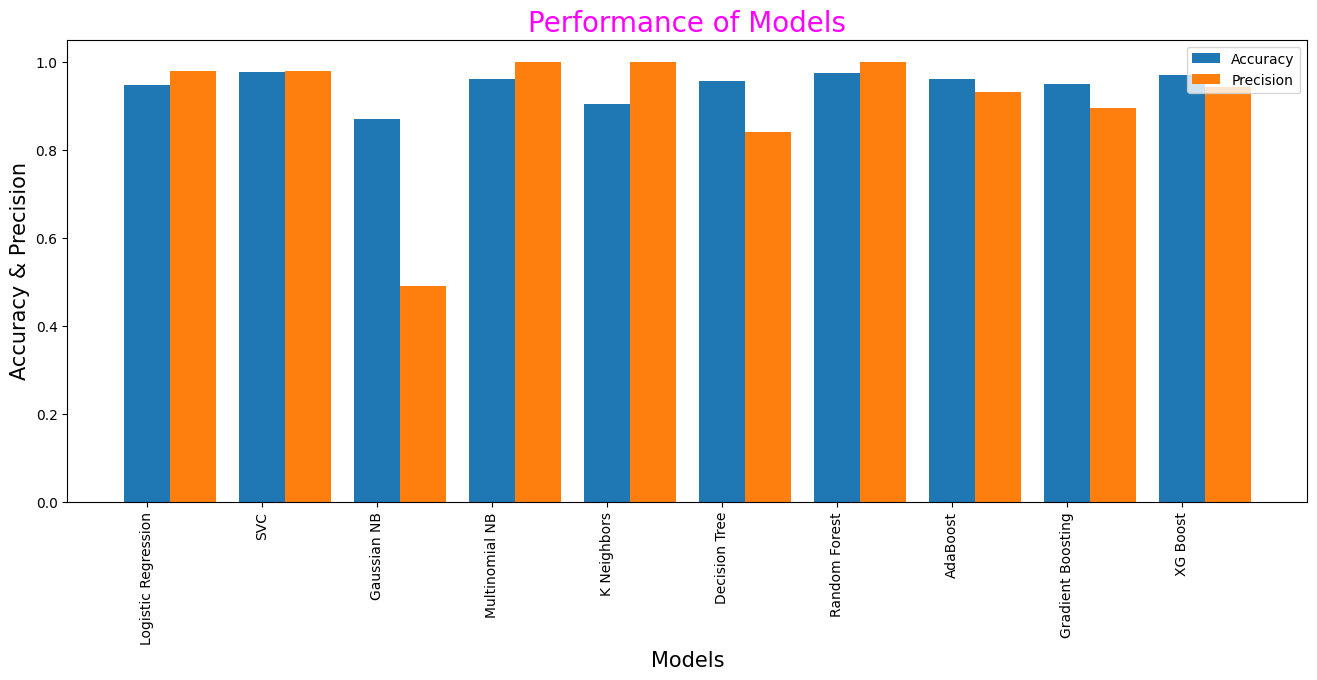

In [ ]:
classifier_class = np.arange(len(clf.keys()))

plt.figure(figsize= (16,6))
width = 0.4

plt.bar(clf.keys() , acc , width, align = "center")
plt.bar(classifier_class+width , prcn, width )

plt.xlabel("Models" , fontsize = 15 , color = "k")
plt.ylabel("Accuracy & Precision",color = "k" ,fontsize = 15)

plt.xticks(rotation = "vertical")

plt.legend(["Accuracy","Precision"] , loc = 1)
plt.title("Performance of Models" , fontsize = 20 , color = "magenta")


plt.show()

In [ ]:
from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(estimators = [("Random Forest",rf) ,("Multinomial NB" , mb) ],voting= "soft")

In [ ]:
voting

VotingClassifier(estimators=[('Random Forest',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('Multinomial NB', MultinomialNB())],
                 voting='soft')

In [ ]:
voting.fit(X_train , y_train)
y_pred = voting.predict(X_test)

print("Accuracy :- " , accuracy_score(y_test , y_pred))
print("Precision :- ",precision_score(y_test , y_pred))


Accuracy :-  0.9690641918020109
Precision :-  1.0


In [ ]:
import pickle 
pickle.dump(tf ,open("Vectorizer.pkl" , "wb"))
pickle.dump(rf , open("Model.pkl","wb"))